In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


![](도수분포표.png)
![](도수분포표2.png)

## 도수분포표란?

- 분할된 구간과 데이터의 개수를 표로 정리한 것


In [3]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
english_scores = np.array(df['english'])
df['english'].describe()
english_scores

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [5]:
freq,_ =np.histogram(english_scores, bins=10, range=(0,100)) 
#반환값이 2개여서 ,_ 의미없는 값 의미
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [9]:
freq_class=[f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

#freq_class를 인덱스로 하는 df를 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


## 계급값
- 각 계급을 대표하는 값으로 계급의 중앙값 이용
- 60 ~ 70의 계급이면 계급값은 65점

In [10]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

## 상대도수
- 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타냄

In [11]:
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [12]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

## 누적 상대도수
- 해당 계급 까지의 상대도수의 합
- 누적합 : np.cumsum()


In [13]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [14]:
# 도수 분포표 확장

freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df


,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


## 도수분포표의 최빈값

- 최대가 되는 계급의 계급값 => 60-70인 계급의 도수가 최대


## 필요 함수 정리

## 판다스 데이터프레임의 idxmax() idxmin() 함수

- pandas.DataFrame.idxmax()의 구문 :
    - DataFrame.idxmax()최대 값의 인덱스를 찾는 방법 행 단위
    - DataFrame.idxmax()메서드를 사용하여 열 단위로 최대 값 인덱스 찾기
- DataFrame.idxmax(axis=0,skipna=True)

- axis: 정수 또는 문자열 유형 매개 변수 사용할 축을 지정행의 경우 0 또는index, 열의 경우 1 또는columns
- skipna: 부울 매개 변수로 이 매개 변수는 널값 제외를 지정  전체 행 또는 열이 널이면 결과는 NA가 됨
- 반환 값 : 지정된 축을 따라 최대 값의 인덱스를 포함하는Series를 반환


In [15]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
print("The Original Data frame is: \n")
print(dataframe)

series = dataframe.idxmax()
print("The Indexes are: \n")
print(series)


The Original Data frame is: 

   Attendance  Obtained Marks
0          60              90
1         100              75
2          80              82
3          78              64
4          95              45
The Indexes are: 

Attendance        1
Obtained Marks    0
dtype: int64


## 도수 분포표 최빈값

In [16]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax()]
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

class value                      65.00
frequency                        18.00
relative frequency                0.36
cumulative relative frequency     0.88
Name: 60~70, dtype: float64

65

## 백분위수 및 사분위수 계산


In [17]:
x = np.arange(1, 12, 1)
print(x)


[ 1  2  3  4  5  6  7  8  9 10 11]


In [18]:
np.percentile(x,10)
np.quantile(x,0.1)

2.0

2.0

In [19]:
np.percentile(x,25)
np.quantile(x,0.25)

3.5

3.5

## 모양 통계량(분포의 모양)

## 왜도(skewness)

- 데이터의 비대칭도
- 분포 모양이 대표값(예. 평균)을 중심으로 좌우의 모양이 대칭적인가 아닌가를 측정
- 데이터가 한쪽 방향으로 얼마나 치우쳐져 있는가를 나타냄 
- 특징
    - 왜도가 0에 가까운 값을 가지면 분포의 모양은 좌우 대칭
    - 왜도가 음수로 나타나면 오른쪽으로 치우친 분포(왼쪽 꼬리분포) 모양

![](../picture/왜도.png)


- Skewed 데이터를 변환하는 이유
    - 꼬리에 있는 값을 모델에 제대로 학습시키기 위함

    - Skewed 되어있는 값을 그대로 학습시키면 꼬리 부분이 상대적으로 모델에 영향이 거의 없이 학습된다.

    - 꼬리 부분이 노이즈가 아니고 유의미한 데이터면 꼬리 부분에 대한 데이터는 예측력이 낮아진다.(학습이 잘 되지 않아서)

    - 변환을 하면, 데이터의 중간값과 꼬리와 가까워져서 모델에 보다 크게 된다.


## 왜도 계산
- 분포의 비대칭도
- 왜도가 0이면 정규분포
- 왜도의 절대값이 1.5 이상이면 많이 치우쳤다고 봄

In [20]:
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30

In [21]:
pd.Series(x1).value_counts(sort=False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

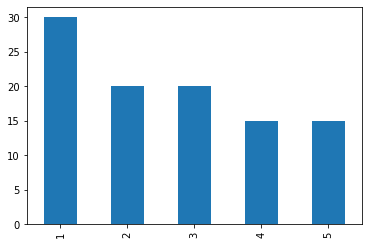

In [22]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

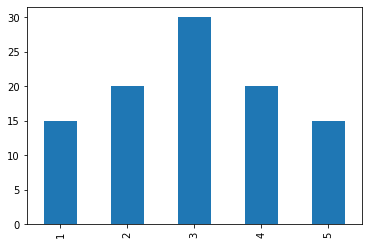

In [23]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

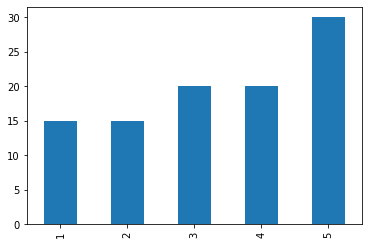

In [24]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

## 외도 계산 함수 skew(data)


In [25]:
print('좌로 치우쳤을 때 왜도 : ', skew(x1))
print('치우치지 않았을 떄 왜도 : ', skew(x2))
print('우로 치우쳤을 때 왜도 : ', skew(x3))

좌로 치우쳤을 때 왜도 :  0.3192801008486361
치우치지 않았을 떄 왜도 :  0.0
우로 치우쳤을 때 왜도 :  -0.31928010084863606


## 첨도(kurtosis)
- 데이터의 분포 모양이 뾰족한 정도
- 분포가 대표값을 중심으로 얼마나 모여 있는가를 나타내는 척도
- 정규분포(첨도=3)를 기준으로 비교
    - 데이터가 대표값을 중심으로 상당히 많이 몰려 있다면 분포 가운데 모양이 뾰족한 모양으로(첨도>3)으로 나타남
    - 데이터가 대표값을 중심으로 좌우에 퍼져있다면 가운데 모양은 완만 (첨도<3)
    
![](../picture/첨도.png)

- 한쪽 꼬리 부분의 극값과 다른쪽 꼬리의 극 값 간의 차이를 보여준다. 아웃라이어 찾을 때 사용된다.

- 첨도가 높으면(Kurtosis > 3) 아웃 라이어가 많이 있다.

- 첨도가 낮으면(Kurtosis < 3) 극값이 정규분포의 값보다 작기 때문에 결과에 대한 확인이 필요.


In [26]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족


<AxesSubplot:>

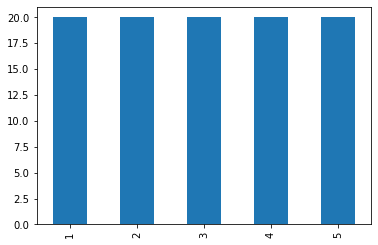

In [27]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

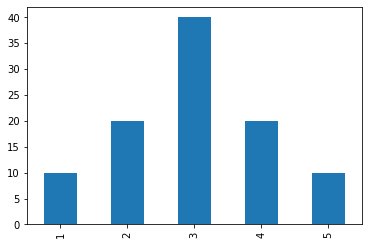

In [28]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

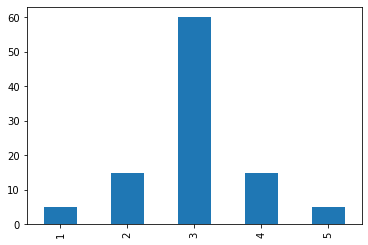

In [29]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

## kurtosis(data) 
- 첨도 계산 함수

In [30]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매 뾰족할 때 첨도", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매 뾰족할 때 첨도 0.8775510204081636
